Opis -> analiza danych z 10 czujników przez 24 godziny co 10 minut
Tensor [10,144,3] -> 10 czujników, 144 pomiary, 3 parametry (temperatura,wilgotoność,ciśnienie)

In [1]:
import numpy as np
import pandas as pd

In [2]:
#tworzymy tesnsor 3D (czujnik, czas, parametr)
np.random.seed(42)
num_sensors = 10
time_steps = 144
num_features = 3

In [3]:
tensor_data = np.random.normal(loc=[22,50,1013],scale=[1,5,10],
                               size=(num_sensors,time_steps,num_features))

In [4]:
print(f"kształt tensora: {tensor_data.shape}")

kształt tensora: (10, 144, 3)


In [5]:
#przekształcenie do formatu DataFrame
sensor_ids = np.arange(1,num_sensors+1)
time_index = pd.date_range("2025-05-07",periods=time_steps,freq="10min")
feature_names = ["temperature","humidity","pressure"]

In [6]:
records = []
for sensor in range(num_sensors):
    for t in range(time_steps):
        record = {
            "sensor_id":sensor_ids[sensor],
            "timestamp":time_index[t],
            "temperature":tensor_data[sensor,t,0],
            "hunidity":tensor_data[sensor,t,1],
            "pressure":tensor_data[sensor,t,2]
        }
        records.append(record)

In [7]:
df = pd.DataFrame.from_records(records)

In [8]:
df.head(5)

,sensor_id,timestamp,temperature,hunidity,pressure
0,1,2025-05-07 00:00:00,22.496714,49.308678,1019.476885
1,1,2025-05-07 00:10:00,23.523030,48.829233,1010.658630
2,1,2025-05-07 00:20:00,23.579213,53.837174,1008.305256
3,1,2025-05-07 00:30:00,22.542560,47.682912,1008.342702
4,1,2025-05-07 00:40:00,22.241962,40.433599,995.750822


In [9]:
#przykład analizy - srednia temperatura każdego czujnika
avg_temp = df.groupby("sensor_id")["temperature"].mean()
print(f"\nŚrednia temperatura na czujnik\n {avg_temp}")


Średnia temperatura na czujnik
 sensor_id
1     22.104403
2     22.011071
3     22.136387
4     22.244797
5     21.956404
6     21.886180
7     22.034667
8     21.915148
9     21.862156
10    21.919651
Name: temperature, dtype: float64


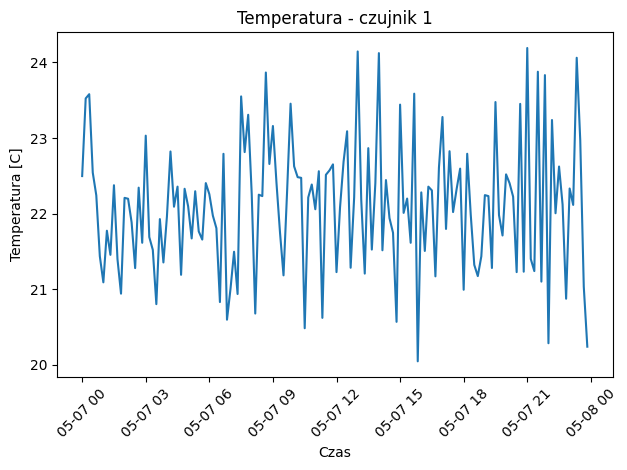

In [10]:
import matplotlib.pyplot as plt

sensor1 = df[df["sensor_id"]==1]
plt.plot(sensor1["timestamp"],sensor1["temperature"])
plt.title("Temperatura - czujnik 1")
plt.xlabel("Czas")
plt.ylabel("Temperatura [C]")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()